Download the Excel file here on crime data in New York State in 2013, provided by the FBI: UCR (Thinkful mirror). https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/table-8/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls

Prepare this data to model with multivariable regression (including data cleaning if necessary) according to this specification:

Propertycrime=α+Population+Population2+Murder+Robbery

 
The 'population' variable is already set for you, but you will need to create the last three features. Robbery and Murder are currently continuous variables. For this model, please use these variables to create categorical features where values greater than 0 are coded 1, and values equal to 0 are coded 0. You'll use this data and model in a later assignment- for now, just write the code you need to get the data ready. Don't forget basic data cleaning procedures, either! Do some graphing to see if there are any anomalous cases, and decide how you want to deal with them.

TO DO:
review basic data cleaning procedures
turn robbery and murder into categorical variables (cat1: =0 cat 2: >0

In [1]:

import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ny_crime = pd.read_excel('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls')

In [3]:
ny_crime

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0
5,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0
6,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0
7,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
8,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN
9,Alfred Village,4089,5,0,NaN,0,3,2,46,10,36,0,NaN


Looking at excel file and the .head() method it looks like the data doesn't really start until the 5th row with the 4th row being the column names. There is also footer information that we don't need starting at row 348

In [4]:
ny_crime = pd.read_excel('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls')
ny_crime.columns = ny_crime.iloc[3]
ny_crime.drop([0,1,2,3,352,353,354], inplace=True) #drop header and footer info

ny_crime.index = ny_crime['City']

ny_crime

3,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
City,,,,,,,,,,,,,
Adams Village,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0
Addison Town and Village,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0
Akron Village,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0
Albany,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
Albion Village,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN
Alfred Village,Alfred Village,4089,5,0,NaN,0,3,2,46,10,36,0,NaN
Allegany Village,Allegany Village,1781,3,0,NaN,0,0,3,10,0,10,0,0
Amherst Town,Amherst Town,118296,107,1,NaN,7,31,68,2118,204,1882,32,3
Amityville Village,Amityville Village,9519,9,0,NaN,2,4,3,210,16,188,6,1


In [5]:
# only focus on columns of interest
ny_crime_coi = ny_crime[['Property\ncrime','Population', 'Murder and\nnonnegligent\nmanslaughter', 'Robbery']] 

# check for null values
ny_crime_coi.isnull().sum()

# no null values. this is good

3
Property\ncrime                           0
Population                                0
Murder and\nnonnegligent\nmanslaughter    0
Robbery                                   0
dtype: int64

In [6]:
# check column dtypes
ny_crime_coi.dtypes
# all of these columns should be integers not objects/strings

3
Property\ncrime                           object
Population                                object
Murder and\nnonnegligent\nmanslaughter    object
Robbery                                   object
dtype: object

In [7]:
# change column dtypes to numeric
for col in ny_crime_coi:
    ny_crime_coi[col] = pd.to_numeric(ny_crime_coi[col])
    
ny_crime_coi.dtypes

c:\python36-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


3
Property\ncrime                           int64
Population                                int64
Murder and\nnonnegligent\nmanslaughter    int64
Robbery                                   int64
dtype: object

In [8]:
def explore_dist(df):
    ''' shows a boxplot and distplot side by side for every column in dataframe.'''
    
    fig, axes = plt.subplots(len(df.iloc[0]),2,figsize=(20,len(df.iloc[0])*7))
    for i in range(len(df.iloc[0])):
        sns.boxplot(data=df.iloc[:,i],ax=axes[i][0], orient='horizontal')
        sns.distplot(df.iloc[:,i], ax=axes[i][1])
    plt.show()

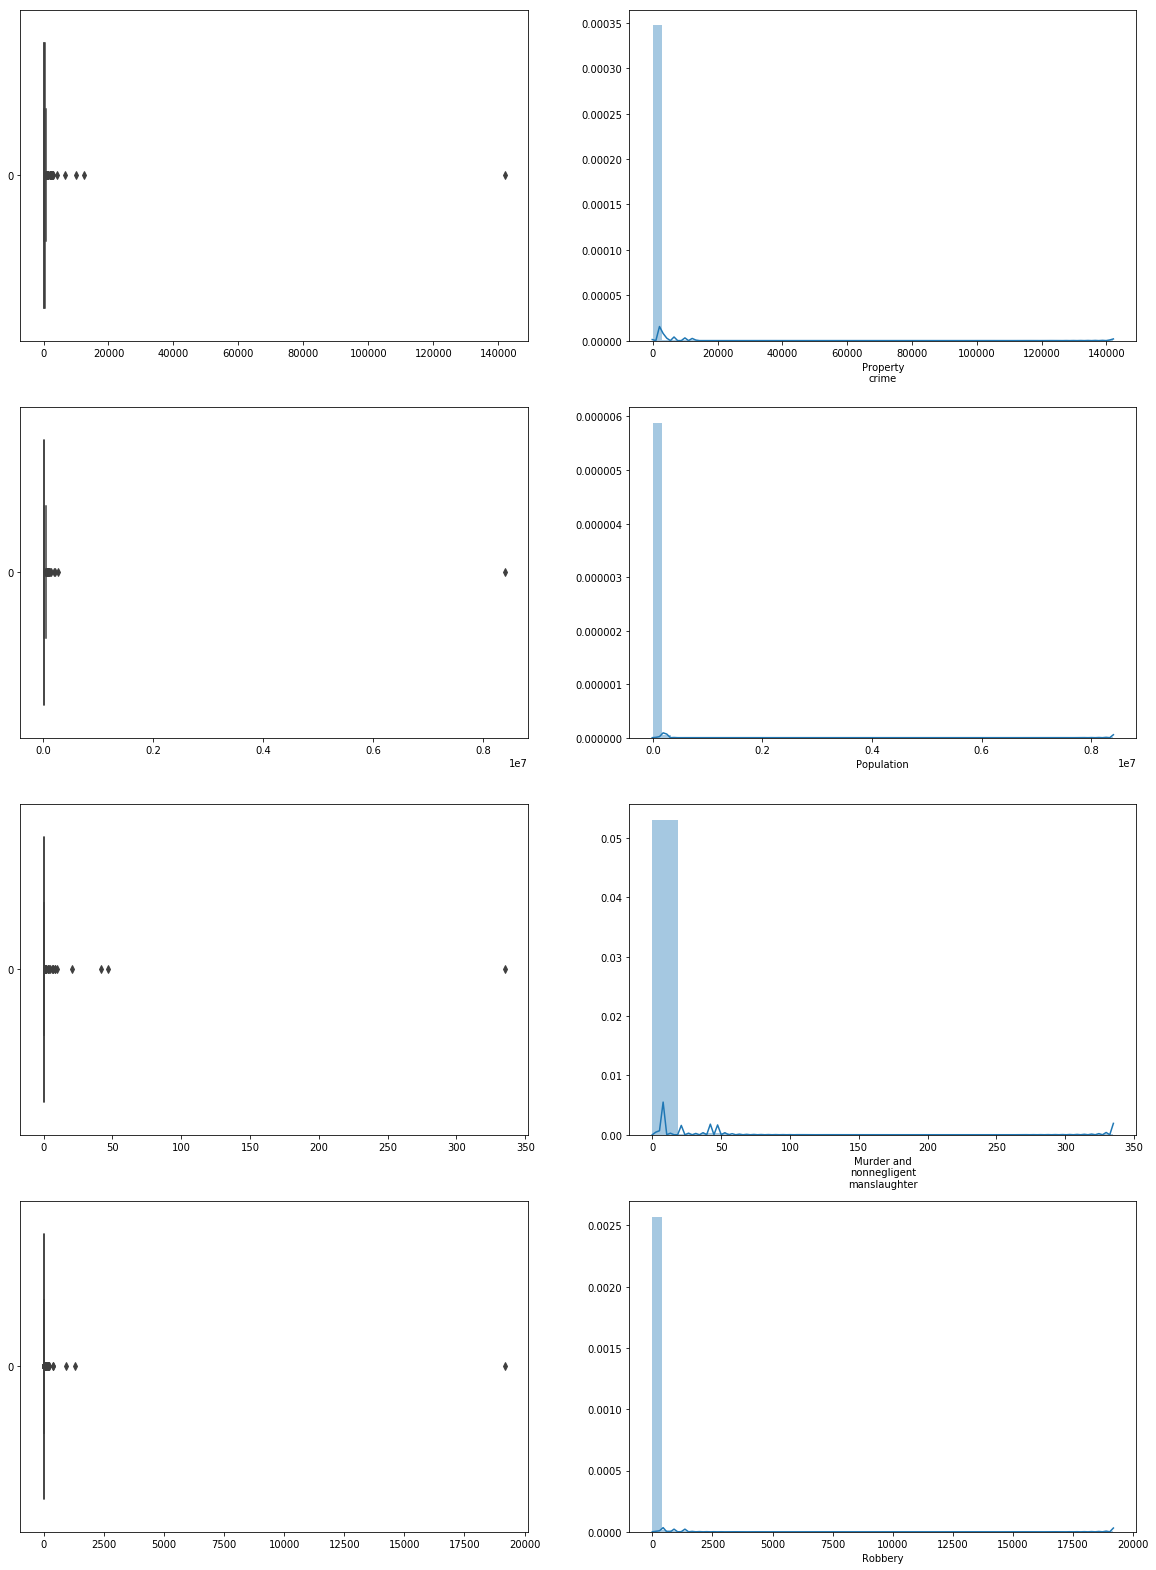

In [9]:
explore_dist(ny_crime_coi)

# it looks like some huge outliers exist

In [10]:
def explore_outliers(df):
    '''prints top 5 values and bottom 5 values for each column in dataframe'''
    for i in range(len(df.iloc[0])):
        series = df.iloc[:,i]
        print(series.sort_values(ascending=False)[:5], '\n', series.sort_values(ascending=True)[:5], '\n')
        

In [11]:
explore_outliers(ny_crime_coi)

#unsurprisingly New York is the biggest outlier in each column

City
New York     141971
Buffalo       12491
Rochester     10051
Syracuse       6473
Albany         4090
Name: Property\ncrime, dtype: int64 
 City
New Berlin Town        0
Port Byron Village     0
Schoharie Village      0
Tuxedo Park Village    0
Shortsville Village    0
Name: Property\ncrime, dtype: int64 

City
New York     8396126
Buffalo       258789
Rochester     210562
Yonkers       199134
Syracuse      143834
Name: Population, dtype: int64 
 City
Glen Park Village       526
Tuxedo Park Village     615
Hammondsport Village    656
Asharoken Village       658
Cape Vincent Village    762
Name: Population, dtype: int64 

City
New York             335
Buffalo               47
Rochester             42
Syracuse              21
Hempstead Village     10
Name: Murder and\nnonnegligent\nmanslaughter, dtype: int64 
 City
Adams Village          0
North Castle Town      0
Nissequogue Village    0
Niskayuna Town         0
Niagara Town           0
Name: Murder and\nnonnegligent\nmanslaughter, d

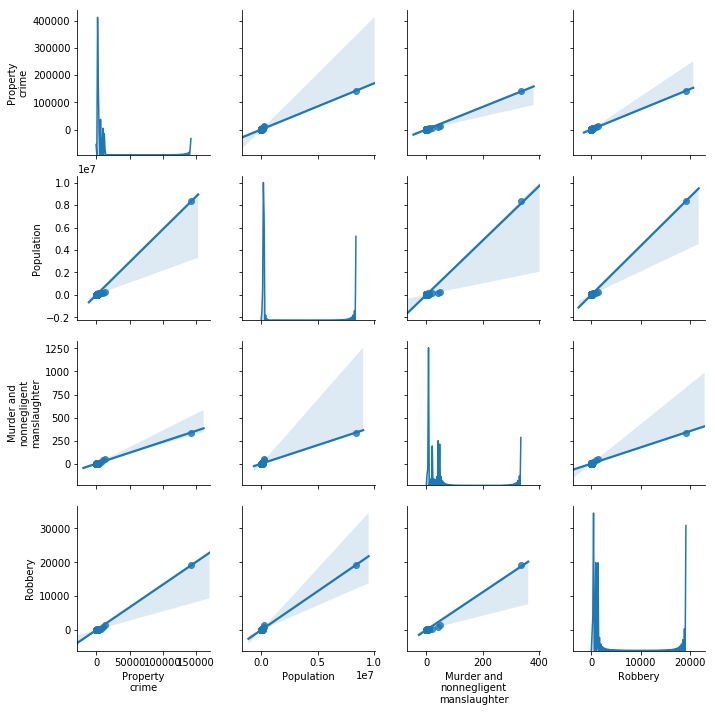

In [12]:
sns.pairplot(ny_crime_coi, diag_kind='kde', kind='reg')
# we can see the effect of New York in the pair plot as well. 
# NY looks to be greatly affecting the estimated linear relationships between the variables

In [13]:
# New York is the huge outlier in the data so we'll drop it for the purposes of this exercise
ny_crime_coi.drop('New York', inplace=True)

c:\python36-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


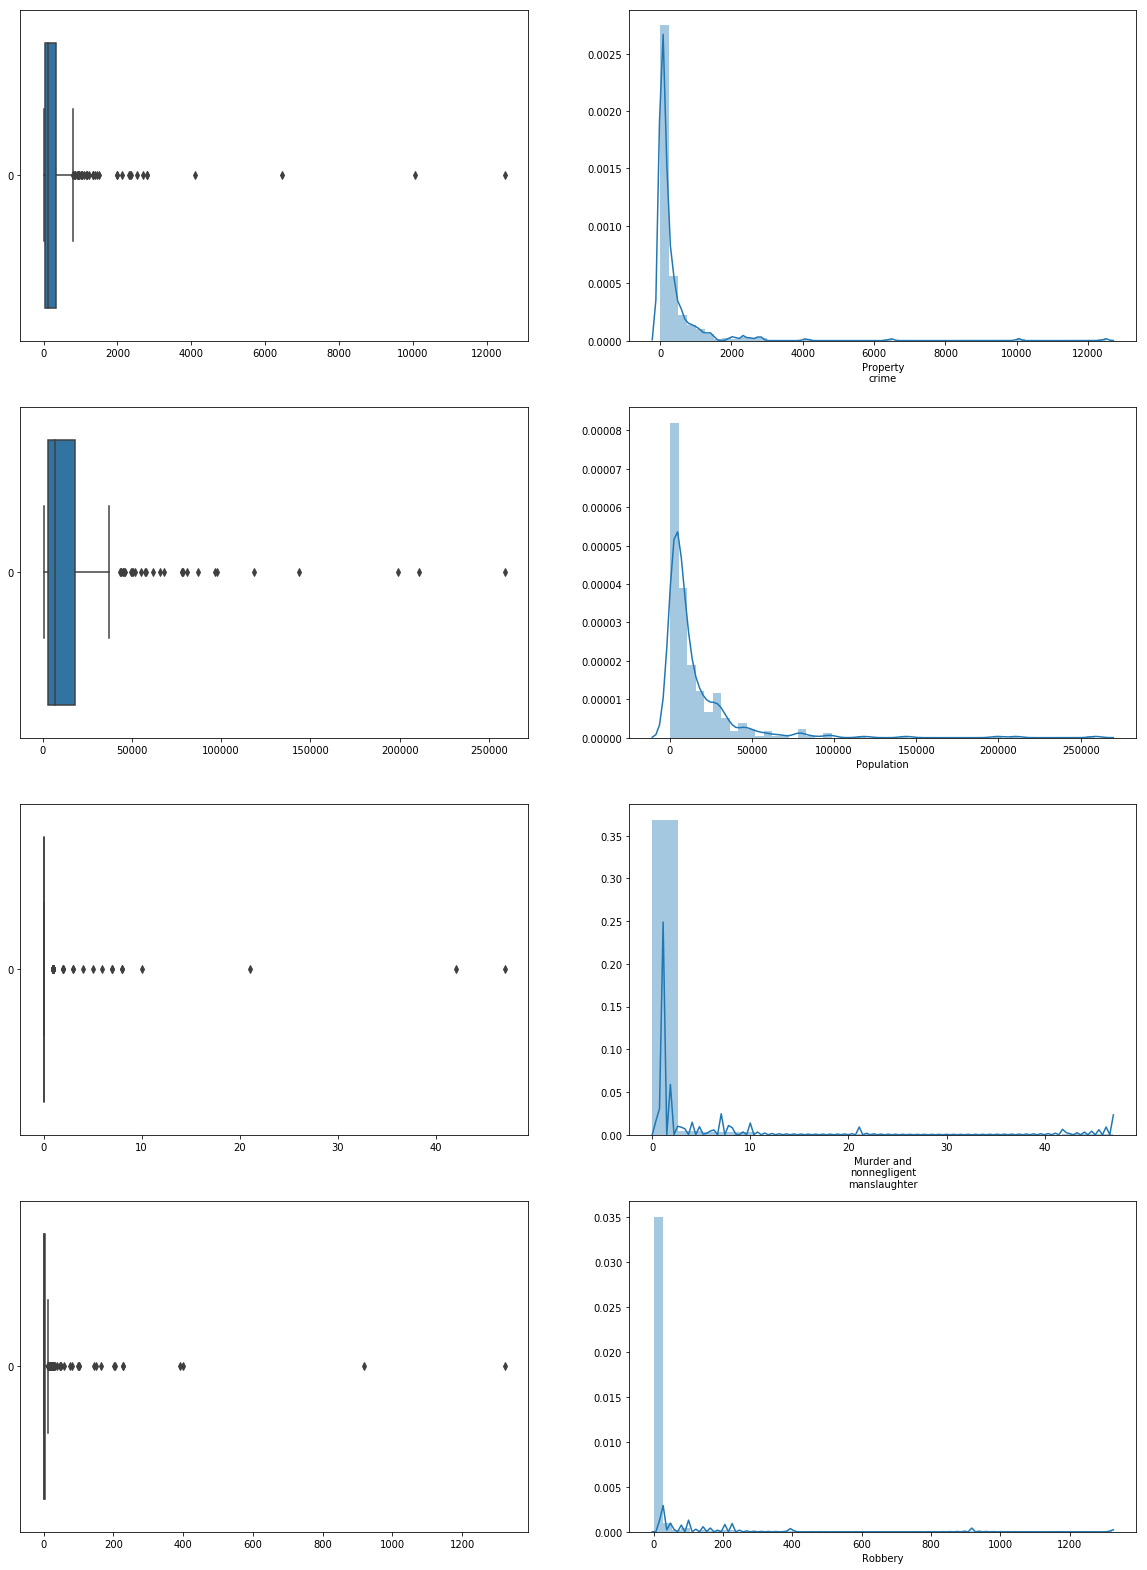

In [14]:
explore_dist(ny_crime_coi)

In [15]:
features = ny_crime_coi[['Property\ncrime','Population']]
features['Population^2'] = features['Population'].apply(lambda x: x**2)
features['Murder'] = np.where(ny_crime_coi['Murder and\nnonnegligent\nmanslaughter']>0,1,0)
features['Robbery'] = np.where(ny_crime_coi['Robbery']>0,1,0)

features

c:\python36-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


3,Property crime,Population,Population^2,Murder,Robbery
City,,,,,
Adams Village,12,1861,3463321,0,0
Addison Town and Village,24,2577,6640929,0,0
Akron Village,16,2846,8099716,0,0
Albany,4090,97956,9595377936,1,1
Albion Village,223,6388,40806544,0,1
Alfred Village,46,4089,16719921,0,1
Allegany Village,10,1781,3171961,0,0
Amherst Town,2118,118296,13993943616,1,1
Amityville Village,210,9519,90611361,0,1
